<a href="https://colab.research.google.com/github/ChrisMath26/Bases_ML/blob/main/Redes%20Neuronales/Christian_Trilleras_Redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANN

El conjunto de datos Student Performance adjunto muestra los siguientes datos de algunos estudiantes:

1. Horas estudiadas
2. Notas previas
3. Actividades extracurriculares (Si / No)
4. Horas de sueño
5. Preguntas de práctica realizadas
6. Nota sacada

Entrene una red neuronal que prediga la nota que sacará un estudiante dadas las características estudiadas de cada sujeto. Para esto utilice dos capas ocultas y tenga cuidado en el tipo de funciones de activación que va a utilizar para la tarea prescrita.

    - Haga un gráfico de cómo evoluciona el MSE en función de las épocas
    - Cuál es el r^2 obtenido

#Importar Librerías Necesarias

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from skimage.transform import resize
from sklearn.metrics import accuracy_score

#Leer banco de datos

In [ ]:
datos = pd.read_csv('Student_Performance.csv')
datos

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


#Preprocesamiento de los datos

In [ ]:
#Selección de variables independientes y dependiente
X = datos.iloc[:,:-1].values
y = datos.iloc[:,-1].values #Nota sacada

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = ct.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X

array([[0.0, 1.0, 7, 99, 9, 1],
       [1.0, 0.0, 4, 82, 4, 2],
       [0.0, 1.0, 8, 51, 7, 2],
       ...,
       [0.0, 1.0, 6, 83, 8, 5],
       [0.0, 1.0, 9, 97, 7, 0],
       [1.0, 0.0, 7, 74, 8, 1]], dtype=object)

In [ ]:
#Estandarizamos desde la columna de la posicion 2 en adelnate pues con las 2 primeras se utilizo one hot encoder
sc = StandardScaler()
x_train[:,2:] = sc.fit_transform(x_train[:,2:])
x_test[:,2:] = sc.transform(x_test[:,2:])
x_train = x_train.astype('float')
x_test = x_test.astype('float')

## Inicializar la red neuronal

In [ ]:
ann = tf.keras.models.Sequential()

#Capas ocultas

In [ ]:
#10 neuronas por cada capa ocultas
ann.add(tf.keras.layers.Dense(units=10, activation='tanh'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

#Capa de salida

In [ ]:
ann.add(tf.keras.layers.Dense(units=1))

#Función de perdida

In [ ]:
# la función de pérdida debe ser acorde al problema q se esta trabajando i.e de regresion
ann.compile(optimizer='adam', loss='mean_squared_error')

#Entrenamiento de la red

In [ ]:
#Esto es útil para prevenir el sobreajuste, ya que detiene el entrenamiento cuando el modelo comienza a ajustarse demasiado a los datos de entrenamiento.
#https://www.youtube.com/watch?v=Vekgrq60Xx4
early_stopping = EarlyStopping(monitor='val_loss', ### Esto sirve para ahorrar tiempo, es una manera inteligente y rápida de hacer las cosas
                               patience=4)          ### Si entre las últimas dos épocas no hay cambios significativos, para
ann.fit(x_train, y_train, batch_size=32, epochs=200,
         validation_data = (x_test, y_test),
         callbacks = early_stopping)


Epoch 1/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3363.1270 - val_loss: 2541.0647
Epoch 2/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1961.6052 - val_loss: 553.2411
Epoch 3/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 393.8567 - val_loss: 115.9200
Epoch 4/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 98.3956 - val_loss: 65.0298
Epoch 5/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 60.8509 - val_loss: 48.8876
Epoch 6/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 44.0382 - val_loss: 35.0249
Epoch 7/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33.2313 - val_loss: 24.5265
Epoch 8/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.2715 - val_loss: 17.8138
Epoch 9/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.2913 - val_loss: 13.3951
Epoch 10/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.8005 - val_loss: 10.6029
Epoch 11/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.6083 - val_loss: 8.7515
Epoch 12/20

In [ ]:
ann.summary()  ### Resumen de la red entrenada

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (32, 10)                    │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 10)                    │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 1)                     │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 575 (2.25 KB)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 384 (1.50 KB)

In [ ]:
historia = ann.history.history
historia

{'loss': [3147.001953125,
  1408.863037109375,
  272.6012878417969,
  83.55235290527344,
  57.30632019042969,
  42.21295928955078,
  29.984737396240234,
  21.454265594482422,
  15.856285095214844,
  12.206822395324707,
  9.764242172241211,
  8.157567024230957,
  7.1201605796813965,
  6.417722225189209,
  5.9381208419799805,
  5.585178852081299,
  5.310642242431641,
  5.103987216949463,
  4.94406795501709,
  4.806273460388184,
  4.692793369293213,
  4.610390663146973,
  4.544312953948975,
  4.4888014793396,
  4.447672367095947,
  4.409854888916016,
  4.389487266540527,
  4.358806133270264,
  4.333596706390381,
  4.326147079467773,
  4.327717304229736,
  4.324071884155273],
 'val_loss': [2541.064697265625,
  553.2411499023438,
  115.91995239257812,
  65.02984619140625,
  48.88764190673828,
  35.02485275268555,
  24.52650260925293,
  17.813833236694336,
  13.395105361938477,
  10.602940559387207,
  8.751511573791504,
  7.521052360534668,
  6.711233615875244,
  6.158137798309326,
  5.65974

#gráfico de cómo evoluciona el MSE en función de las épocas

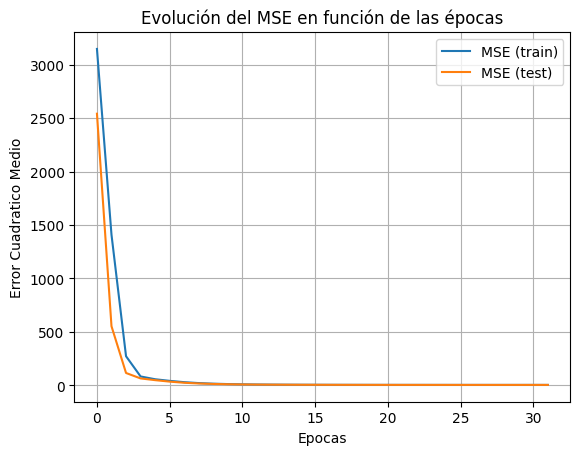

In [ ]:
plt.plot(historia['loss'], label='MSE (train)')
plt.plot(historia['val_loss'], label='MSE (test)')
plt.xlabel('Epocas')
plt.ylabel('Error Cuadratico Medio')
plt.title('Evolución del MSE en función de las épocas')
plt.grid()
plt.legend()
plt.show()

#Predicción

In [ ]:
prediccion = ann.predict(x_test)
prediccion

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[49.95382 ],
       [52.531975],
       [78.12723 ],
       ...,
       [64.47645 ],
       [25.618628],
       [17.90789 ]], dtype=float32)

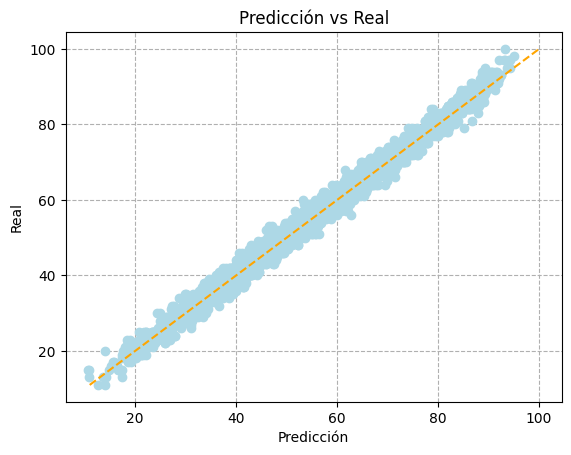

In [ ]:
plt.plot(prediccion, y_test, 'o', color = 'lightblue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'orange', linestyle = '--')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Predicción vs Real')
plt.grid(True, linestyle = '--')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, prediccion)
mse = mean_squared_error(y_test, prediccion)
r2 = r2_score(y_test, prediccion)

print(f'El MAE score es: {mae}')
print(f'El MSE score es: {mse}')
print(f'El r^2 score es: {r2}')

El MAE score es: 1.653931812763214
El MSE score es: 4.285803197800635
El r^2 score es: 0.9875449772340313


## Redes Convolusionales

Desacargue el conjunto de imagenes adjuntas que corresponden a fotos de cancer de piel benignos y malignos. Entrene una red neuronal convolusional para predecir si una nueva imagen es o no cancerosa. Intente con varios hyperparámetros, i.e: funciones de activación, número de neuronas en capas ocultas, número de kernel convolusionales, entre otros que le permitan una capacidad predictiva adecuada

#Importar librerías necesarias

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import zipfile
import io


In [ ]:
# Subir el archivo ZIP a Colab
uploaded = files.upload()
# Obtener el nombre del archivo ZIP
zip_filename = next(iter(uploaded))
# Crear un objeto ZipFile
with zipfile.ZipFile(io.BytesIO(uploaded[zip_filename]), 'r') as zip_ref:
    # Extraer los archivos en el directorio actual
    zip_ref.extractall()

Saving Skin_Data_2.zip to Skin_Data_2.zip


### Preprocesamiento en el conjunto de entrenamiento

Para evitar overfitting es necesario aplicar una técnica conocida como **Image Augmentation**, consiste en realizar una serie de operaciones sobre las imágenes de entrenamiento para modificarlas y generar conjuntos de datos "ruidosos" que evitan el sobreajuste

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_dataset = train_datagen.flow_from_directory(
        'Skin_Data/TRAIN',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 204 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'Cancer': 0, 'NoCancer': 1}

#### Preprocesamiento del conjunto de prueba

Solo se debe hacer un reescalamiento.

In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255)
test_dataset = test_datagen.flow_from_directory(
        'Skin_Data/TEST',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 84 images belonging to 2 classes.


##Construir la CNN

In [ ]:
cnn = tf.keras.models.Sequential()

##Capas Convolucionlaes y Maxpooling

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Capa convolucional 2 y MaxPooling
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Capa convolucional 3 y MaxPooling
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Terminar la conexión

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

##Output layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

##Entrenamiento de la CNN

#Compilar la CNN

In [ ]:
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Entrenar

In [ ]:
cnn.fit(x = train_dataset, validation_data = test_dataset, epochs = 50)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 387ms/step - accuracy: 0.6709 - loss: 0.6134 - val_accuracy: 0.5000 - val_loss: 0.8059
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step - accuracy: 0.8128 - loss: 0.5280 - val_accuracy: 0.5000 - val_loss: 0.9977
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 350ms/step - accuracy: 0.7998 - loss: 0.5105 - val_accuracy: 0.5000 - val_loss: 0.9147
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - accuracy: 0.7765 - loss: 0.5297 - val_accuracy: 0.5000 - val_loss: 0.8988
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.7710 - loss: 0.5366 - val_accuracy: 0.5000 - val_loss: 1.0976
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.7829 - loss: 0.5360 - val_accuracy: 0.5000 - val_loss: 0.9432
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 335ms/step - accuracy: 0.8355 - loss: 0.4611 - val_accuracy: 0.5000 - val_loss: 0.9128
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 239ms/step - accuracy: 0.7799 - loss: 0.5176 - val_accuracy: 0.5000 - val_loss:

In [ ]:
test_loss, test_acc = cnn.evaluate(test_dataset)
print(f'Precisión en el conjunto de prueba: {test_acc:.4f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.8110 - loss: 0.4745
Precisión en el conjunto de prueba: 0.8095


# Ajustando filtros, kernels, unidades en la capa densa y funciones de activación:

In [ ]:
cnn1 = tf.keras.models.Sequential()

# Capa convolucional 1: 32 filtros, kernel de 3x3, función de activación 'relu'
cnn1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Capa convolucional 2: 64 filtros, kernel de 5x5, función de activación 'tanh'
cnn1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=5, activation='tanh'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Capa convolucional 3: 128 filtros, kernel de 3x3, función de activación 'leaky_relu'
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
cnn1.add(tf.keras.layers.Flatten())

# Capa densa con función de activación 'relu'
cnn1.add(tf.keras.layers.Dense(units=256, activation='relu'))

# Capa densa con función de activación 'tanh'
cnn1.add(tf.keras.layers.Dense(units=128, activation='tanh'))

# Capa de salida con función de activación 'sigmoid' (para clasificación binaria)
cnn1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compilar el modelo
cnn1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
cnn1.fit(x=train_dataset, validation_data=test_dataset, epochs=50)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 611ms/step - accuracy: 0.5577 - loss: 0.6251 - val_accuracy: 0.5000 - val_loss: 1.1939
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 328ms/step - accuracy: 0.7924 - loss: 0.5076 - val_accuracy: 0.5000 - val_loss: 0.9764
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 329ms/step - accuracy: 0.8246 - loss: 0.4702 - val_accuracy: 0.5000 - val_loss: 0.8180
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 342ms/step - accuracy: 0.7954 - loss: 0.5171 - val_accuracy: 0.5000 - val_loss: 1.0376
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 344ms/step - accuracy: 0.7817 - loss: 0.5307 - val_accuracy: 0.5000 - val_loss: 0.8982
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 353ms/step - accuracy: 0.7794 - loss: 0.4764 - val_accuracy: 0.6071 - val_loss: 0.7003
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 351ms/step - accuracy: 0.7655 - loss: 0.4744 - val_accuracy: 0.5000 - val_loss: 1.4201
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 513ms/step - accuracy: 0.7957 - loss: 0.4750 - val_accuracy: 0.5714 - val_loss:

In [ ]:
test_loss, test_acc = cnn1.evaluate(test_dataset)
print(f'Precisión en el conjunto de prueba: {test_acc:.4f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.7954 - loss: 0.6000
Precisión en el conjunto de prueba: 0.8095


## ANN 2

Otro de los conjuntos de datos interesantes que se pueden utilizar para probar modelos en Machine Learning es el conjunto MNIST Fashion. Al igual que digits, es un conjunto con imágenes de algunas prendas de vestir en blanco y negro. La tarea consite en lo siguiente:

1. Utilice la red neuronal que construímos a mano con dos capas ocultas. Realice el cálculo de las expresiones para el descenso del gradiente durante la retropropagación para esta nueva capa oculta e implemente nuevamente una red para esta tarea de clasificación

2. Compare los resultados obtenidos con una ANN usando TensorFlow sin capas convolusión

3. Compare los resultados 1 y 2 con una red convolusional

#Librerías necesarias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

#Importar el banco de datos

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, parser = 'auto')

In [ ]:
#separamos las características (imágenes) y las etiquetas en las variables X y y, respectivamente.
X, y = mnist.data, mnist.target

In [ ]:
lb=LabelBinarizer()
X = mnist["data"][0:5000]
y = mnist["target"][0:5000]
X = X.values.reshape(X.shape[0], -1) / 255 #apalnar imagenes y escalar
y=y.iloc[:].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
yTrain_oneHot=lb.fit_transform(y_train)
yTest_oneHot=lb.fit_transform(y_test)

In [ ]:
# Definimos la función de activación ReLU
def relu(x):
  return np.maximum(0,x)
  raise Exception("Debe Implementar la funcion de activación ReLu")

# Definimos la función de activación softmax
def softmax(x):
    exp_x = np.exp(x)
    sumatoria = np.sum(exp_x, axis =1, keepdims= True)
    return exp_x / sumatoria
# Definimos los hiperparámetros para la red
epochs = 2000 # Número de iteraciones de entrenamiento
eta= 0.0001 #Tasa de aprendizaje para la actualización de pesos.
X_input = X_train
y_input = yTrain_oneHot
#Tamaños de las diferentes capas de la red
capa_de_entrada = 784
capa_oculta = 64
capa_oculta2 = 32
capa_salida = 10

#Pesos y Bias
W_1 = np.random.uniform(size=(capa_de_entrada, capa_oculta )) - 0.5
W_2 = np.random.randn(capa_oculta, capa_oculta2 ) - 0.5
W_3 = np.random.uniform(size=(capa_oculta2 , capa_salida)) - 0.5
b_1 = np.random.uniform(size=(1, capa_oculta)) - 0.5
b_2 = np.random.uniform(size=(1, capa_oculta2)) - 0.5
b_3 = np.random.uniform(size=(1, capa_salida)) - 0.5

# Entrenamos la red neuronal
error=np.zeros(epochs)
for i in range(epochs):

    # Forward pass
    A_1 = X_train
    Z_2 = A_1 @ W_1 + b_1
    A_2 = np.maximum(0, Z_2)
    Z_3 = A_2 @ W_2 + b_2
    A_3 = np.maximum(0, Z_3)  # Nueva capa oculta
    Z_4 = A_3 @ W_3 + b_3
    y_hat = np.exp(Z_4) / np.sum(np.exp(Z_4), axis=1, keepdims=True)

    # Calculo del error
    error[i]=-np.sum(y_input*np.log(y_hat))
    if (i%100==0):
      print(f"iteracion {i} , error:{error[i]}")
    # Backpropagation
    delta4 = y_hat - y_input
    d_w3 = A_3.T @ delta4
    d_b3 = np.sum(delta4, axis=0)

    delta3 = delta4 @ W_3.T * (Z_3 > 0)
    d_w2 = A_2.T @ delta3
    d_b2 = np.sum(delta3, axis=0)

    delta2 = delta3 @ W_2.T * (Z_2 > 0)
    d_w1 = A_1.T @ delta2
    d_b1 = np.sum(delta2, axis=0)

    # Actualizamos los pesos con la dirección del gradiente descendiente
    W_3-=eta*d_w3
    b_3-=eta*d_b3
    W_2-=eta*d_w2
    b_2-=eta*d_b2
    W_1-=eta*d_w1
    b_1-=eta*d_b1

iteracion 0 , error:14116.68380692565
iteracion 100 , error:4931.181825710966
iteracion 200 , error:3409.0309099324922
iteracion 300 , error:1715.9141202042538
iteracion 400 , error:1173.3406445134335
iteracion 500 , error:1093.6070499970867
iteracion 600 , error:575.4038122989648
iteracion 700 , error:480.68253956226533
iteracion 800 , error:424.6268430044994
iteracion 900 , error:381.210839904572
iteracion 1000 , error:351.65166979295225
iteracion 1100 , error:330.1961548996866
iteracion 1200 , error:312.4263501382624
iteracion 1300 , error:289.5232607094616
iteracion 1400 , error:269.63440019413724
iteracion 1500 , error:249.57433834697366
iteracion 1600 , error:238.12086209278277
iteracion 1700 , error:230.79907228416647
iteracion 1800 , error:218.67641197588017
iteracion 1900 , error:209.4321235127149


#PREDICCIÓN

In [ ]:
# Predicciones en el conjunto de prueba
a1_test = X_test
z2_test = a1_test @ W_1 + b_1
a2_test = relu(z2_test)
z3_test = a2_test @ W_2 + b_2
a3_test = relu(z3_test)
z4_test = a3_test @ W_3 + b_3
y_pred = np.exp(z4_test) / np.sum(np.exp(z4_test), axis=1, keepdims=True)

# Clases predichas
y_pred_target = np.argmax(y_pred, axis=1)
#Use yTest_oneHot instead of y_input
y_target = np.argmax(yTest_oneHot, axis=1)

# Calcular la precisión
predic_correctas = np.sum(y_pred_target == y_target)
accuracy = predic_correctas / len(y_target)

print(f"Precisión en el conjunto de prueba: {accuracy}")

Precisión en el conjunto de prueba: 0.873


#Implementación de ANN

In [ ]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist["data"], mnist["target"]
X = X.values.reshape(X.shape[0], -1) / 255  # Normalización y aplanado
y = y.astype(int)  # Asegurar que las etiquetas sean enteros

# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lb = LabelBinarizer()
y_train_one_hot = lb.fit_transform(y_train)
y_test_one_hot = lb.transform(y_test)


In [ ]:

# Definimos el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamos el modelo
# Entrenamos el modelo using one-hot encoded labels
history = model.fit(X_train, y_train_one_hot, epochs=100, batch_size=32, validation_split=0.2)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8330 - loss: 0.5769 - val_accuracy: 0.9431 - val_loss: 0.1979
Epoch 2/100
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9518 - loss: 0.1634 - val_accuracy: 0.9621 - val_loss: 0.1305
Epoch 3/100
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9669 - loss: 0.1129 - val_accuracy: 0.9646 - val_loss: 0.1203
Epoch 4/100
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9735 - loss: 0.0872 - val_accuracy: 0.9657 - val_loss: 0.1150
Epoch 5/100
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9795 - loss: 0.0675 - val_accuracy: 0.9699 - val_loss: 0.1044
Epoch 6/100
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9815 - loss: 0.0572 - val_accuracy: 0.9701 - val_loss: 0.1071
Epoch 7/100
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9864 - loss: 0.0430 - val_accuracy: 0.9684 - val_loss: 0.1089
Epoch 8/100
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9866 - loss: 

In [ ]:
# Convertir las etiquetas de one-hot a clases para el conjunto de prueba
y_test_clas = np.argmax(y_test_one_hot, axis=1)

# Obtener predicciones del modelo para el conjunto de prueba
y_pred_probs = model.predict(X_test)
y_pred_clas = np.argmax(y_pred_probs, axis=1)

# Calcular la precisión en el conjunto de prueba
accuracy = np.sum(y_pred_clas == y_test_clas) / len(y_test_clas)
print(f"Precisión en el conjunto de prueba: {accuracy}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Precisión en el conjunto de prueba: 0.9691428571428572


#Implementación de CNN

In [ ]:
X_train_redimensionado= np.array([resize(img, (64, 64)) for img in X_train])
X_train_redimensionado = X_train_redimensionado.reshape(X_train_redimensionado.shape[0], 64, 64, 1)

In [ ]:
# Normalizar los valores de los píxeles a [0, 1]
X_train_redimensionado = X_train_redimensionado / 255.0

# Convertir las etiquetas a one-hot encoding usando LabelBinarizer
lb = LabelBinarizer()
y_train_one_hot = lb.fit_transform(y_train)  # Ajustar y transformar etiquetas de entrenamiento


In [ ]:

cnn = tf.keras.models.Sequential()

# Primera capa convolucional con 64 filtros, tamaño de kernel 3x3, función de activación ReLU
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(64, 64, 1)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Segunda capa convolucional con 34 filtros, tamaño de kernel 3x3, función de activación ReLU
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Aplanar la salida de las capas convolucionales para pasar a las capas densas
cnn.add(tf.keras.layers.Flatten())
# Capa densa con 128 unidades y función de activación ReLU
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Capa de salida con 10 unidades (una por cada clase)
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo con los datos de entrenamiento
history = cnn.fit(X_train_redimensionado, y_train_one_hot, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 356s 254ms/step - accuracy: 0.1118 - loss: 2.3016 - val_accuracy: 0.1155 - val_loss: 2.3011
Epoch 2/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 349s 249ms/step - accuracy: 0.1099 - loss: 2.3013 - val_accuracy: 0.1155 - val_loss: 2.3012
Epoch 3/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 346s 247ms/step - accuracy: 0.1095 - loss: 2.3015 - val_accuracy: 0.1155 - val_loss: 2.3012
Epoch 4/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 385s 249ms/step - accuracy: 0.1118 - loss: 2.3016 - val_accuracy: 0.1155 - val_loss: 2.3012
Epoch 5/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 380s 248ms/step - accuracy: 0.1127 - loss: 2.3008 - val_accuracy: 0.1155 - val_loss: 2.3012
Epoch 6/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 346s 247ms/step - accuracy: 0.1096 - loss: 2.3017 - val_accuracy: 0.1155 - val_loss: 2.3011
Epoch 7/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 348s 248ms/step - accuracy: 0.1065 - loss: 2.3020 - val_accuracy: 0.1155 - val_loss: 2.3011
Epoch 8/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 380s 247ms/step - ac

In [ ]:
# Redimensionar y normalizar las imágenes en el conjunto de prueba
X_test_resized = np.array([resize(img, (64, 64)) for img in X_test])
X_test_resized = X_test_resized.reshape(X_test_resized.shape[0], 64, 64, 1)
X_test_resized = X_test_resized / 255.0
y_test_one_hot = lb.transform(y_test)

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = cnn.evaluate(X_test_resized, y_test_one_hot)
print(f"Precisión en el conjunto de prueba: {test_acc}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.1115 - loss: 2.3016
Precisión en el conjunto de prueba: 0.11428571492433548


In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_proba = cnn.predict(X_test_resized)
# Convertir las probabilidades predichas a etiquetas de clase
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Convertir las etiquetas de prueba de one-hot encoding a clases
y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Calcular precisión usando sklearn
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Precisión del modelo: {accuracy}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 59s 135ms/step
Precisión del modelo: 0.11428571428571428
